In [ ]:
import tensorflow as tf

In [ ]:
device=tf.test.gpu_device_name()
if device != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
from keras.utils import to_categorical
#Converts a class vector (integers) to binary class matrix

In [ ]:
print('training data shape :',train_images.shape,train_labels.shape)

training data shape : (50000, 32, 32, 3) (50000, 1)


In [ ]:
# Find the unique numbers from the train labels
classes= np.unique(train_labels)
nClasses= len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

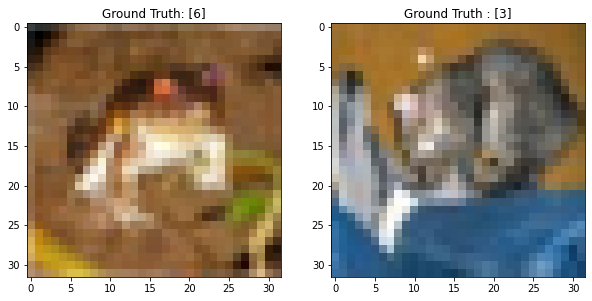

In [ ]:
plt.figure(figsize=[10,10])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title("Ground Truth: {}".format(train_labels[0]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [ ]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]

In [ ]:
nRows

32

In [ ]:
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)

In [ ]:
#Each row of the array stores a 32x32 colour image
train_images.shape[0]

50000

In [ ]:
np.shape(train_images)

(50000, 32, 32, 3)

In [ ]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

In [ ]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [ ]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0:10])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0:10])

Original label 0 :  [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
After conversion to categorical ( one-hot ) :  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
def createModel():
    #A Sequential model is appropriate for a plain stack
    #of layers where each layer has exactly one input tensor
    #and one output tensor.
    #A Sequential model is not appropriate when:
    """Your model has multiple inputs or multiple outputs
    Any of your layers has multiple inputs or multiple outputs
    You need to do layer sharing
    You want non-linear topology"""
    model = Sequential()
    """You can create a Sequential model by passing
    a list of layers to the Sequential constructor:"""
    #create a Sequential model incrementally via the add() method:
    # The first two layers with 32 filters of window size 3x3
    """When you instantiate a Sequential model without an input
    shape, it isn't "built": it has no weights
    (and calling model.weights results in an error
     stating just this). The weights are created when the model
      first sees some input data:"""

    #model.add(keras.Input(shape=(4,))) #specify shape of input
    """Conv2D : create a convolution kernel
    KERNEL :An image processing Kernel is a CONVOLUTION MATRIX (masks)
    which can be used for blurring,sharpening,embossing,edge detection...
    and this by doing convolution between a kernel and an image
    """
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    """Pooling : involves sliding a two-dimensional filter
    over each channel of feature map and summarising
     the features lying within the region covered by
      the filter"""
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model

In [ ]:
model1 = createModel()
print(len(model1.layers))
print(model1.layers)
print(model1.summary)

16
[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9da008f8d0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9da01a4310>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9d640e7c50>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f9d640e7a50>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9da007f410>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9d640ad790>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9d640e7990>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f9db05250d0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9db056af90>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9db0544890>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9db05aef50>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f9db05b4410>, <tensorflow.python.keras.layers.core.Flatten object at 0x7f9

In [ ]:
batch_size = 256
epochs = 50
"""To train a model with fit(), you need to specify a loss function,
 an optimizer, and optionally, some metrics to monitor."""
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


#Batch size is a term used in machine learning and refers
#to the number of training examples utilized in one iteration
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 38s 24ms/step - loss: 2.2084 - accuracy: 0.1689 - val_loss: 1.9448 - val_accuracy: 0.2923
Epoch 2/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7656 - accuracy: 0.3561 - val_loss: 1.5175 - val_accuracy: 0.4524
Epoch 3/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5403 - accuracy: 0.4408 - val_loss: 1.4710 - val_accuracy: 0.4621
Epoch 4/50
196/196 [==============================] - 4s 20ms/step - loss: 1.3913 - accuracy: 0.4990 - val_loss: 1.2825 - val_accuracy: 0.5470
Epoch 5/50
196/196 [==============================] - 4s 20ms/step - loss: 1.2875 - accuracy: 0.5417 - val_loss: 1.1955 - val_accuracy: 0.5709
Epoch 6/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1961 - accuracy: 0.5742 - val_loss: 1.0879 - val_accuracy: 0.6150
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 1.1211 - accuracy: 0.6055 - val_loss: 1.0944 - val_accuracy: 0.615

[0.5802321434020996, 0.8097000122070312]

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

Text(0.5, 1.0, 'Loss Curves')

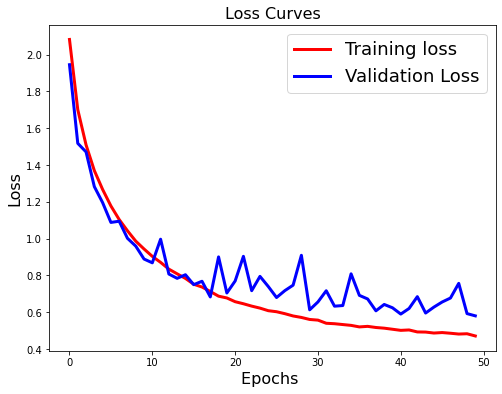

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

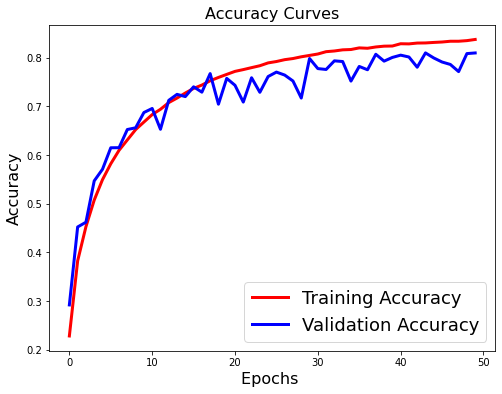

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)